# TASK 3 — Linear Regression on Housing Dataset
## Objective: Understand & implement simple multiple linear regression

### Import Libraries & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Preprocessing (Encoding + Cleaning)

In [4]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


### Checking the missing Values

In [6]:
df_encoded.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Fit Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Evaluate Model (MAE, MSE, RMSE, R²)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 970043.4039201641
MSE: 1754318687330.6646
RMSE: 1324506.9600914388
R² Score: 0.6529242642153182


### Plot Regression Line

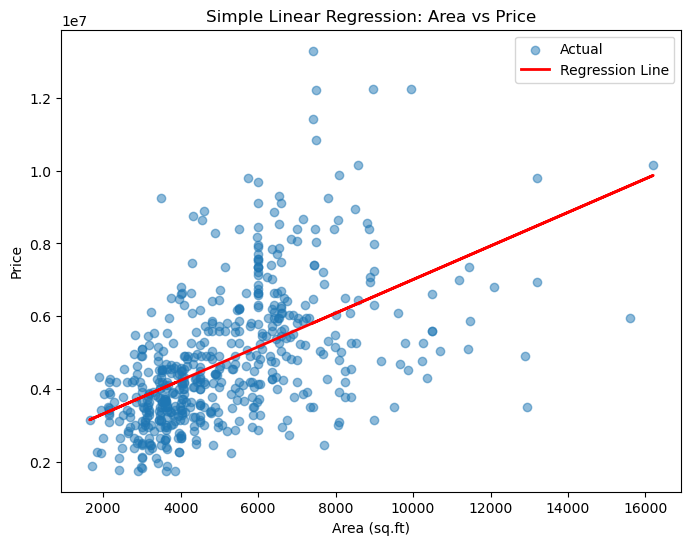

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], alpha=0.5, label="Actual")

# Simple model with area only
from sklearn.linear_model import LinearRegression

m2 = LinearRegression()
m2.fit(df[['area']], df['price'])
y_line = m2.predict(df[['area']])

plt.plot(df['area'], y_line, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()


### Interpret Coefficients

In [12]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
2,bathrooms,1.094445e+06
9,airconditioning_yes,7.914267e+05
8,hotwaterheating_yes,6.846499e+05
10,prefarea_yes,6.298906e+05
3,stories,4.074766e+05
7,basement_yes,3.902512e+05
5,mainroad_yes,3.679199e+05
6,guestroom_yes,2.316100e+05
4,parking,2.248419e+05
1,bedrooms,7.677870e+04


If area has coefficient 3000:

For every increase of 1 sq.ft area, price increases by ₹3000 (approx).

If bathrooms_2 has coefficient 1500000:

Houses with 2 bathrooms cost ₹15 lakhs more on average.

## Actual vs Predicted Plot

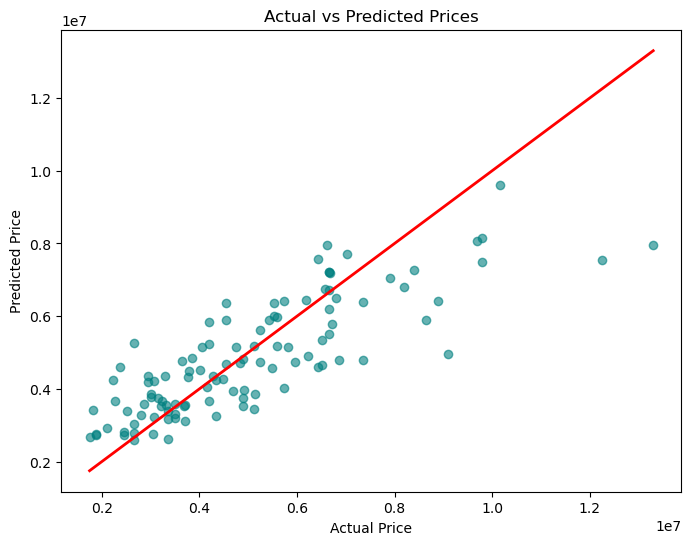

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


## Residual Plot

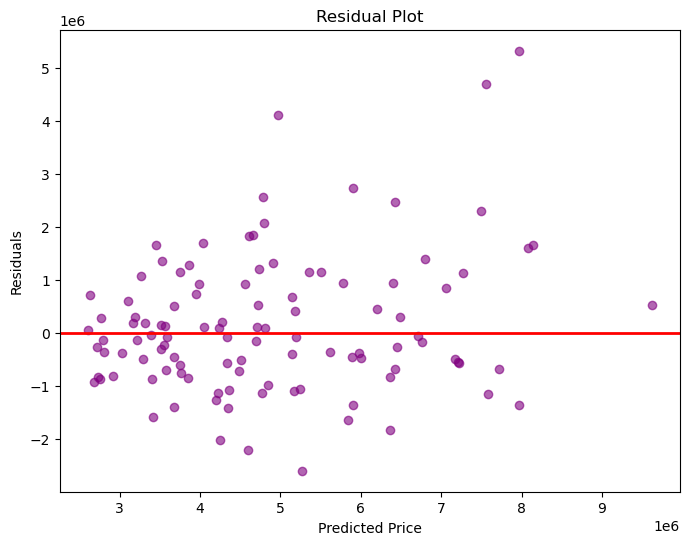

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


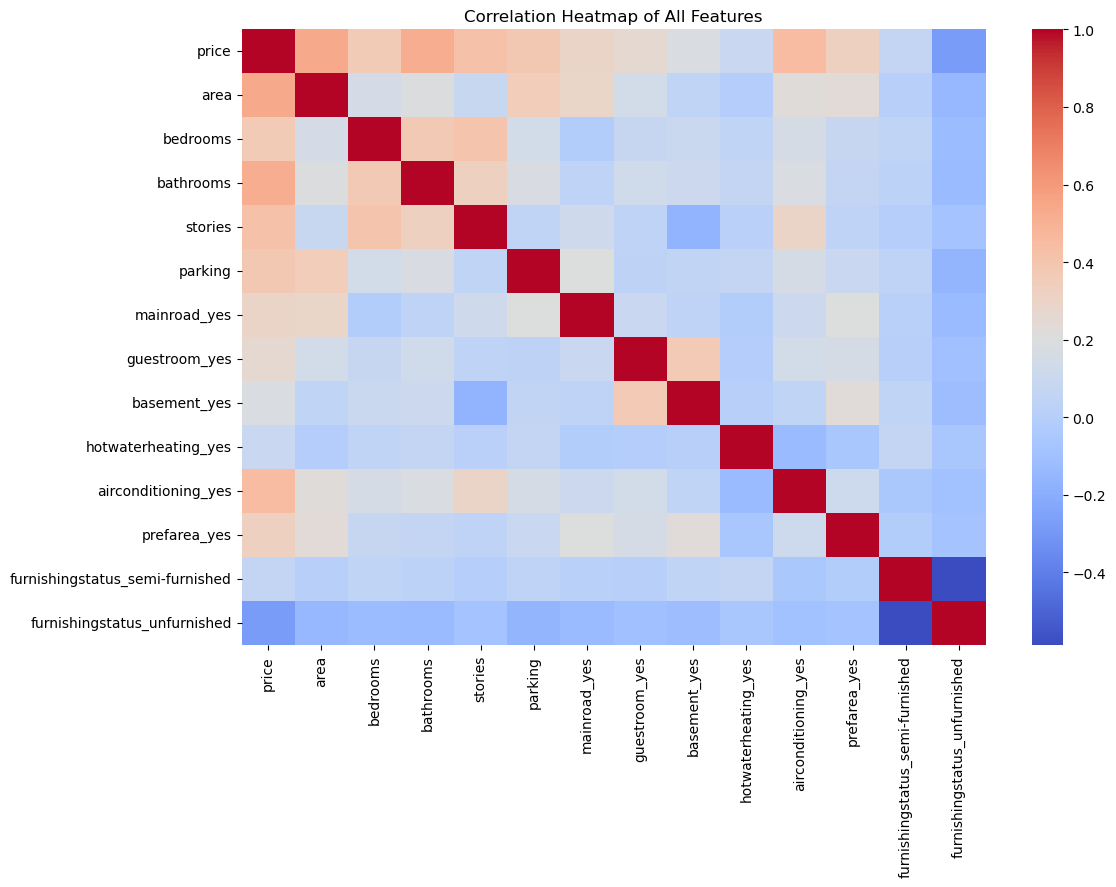

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of All Features")
plt.show()


## Predicted vs Residuals Density

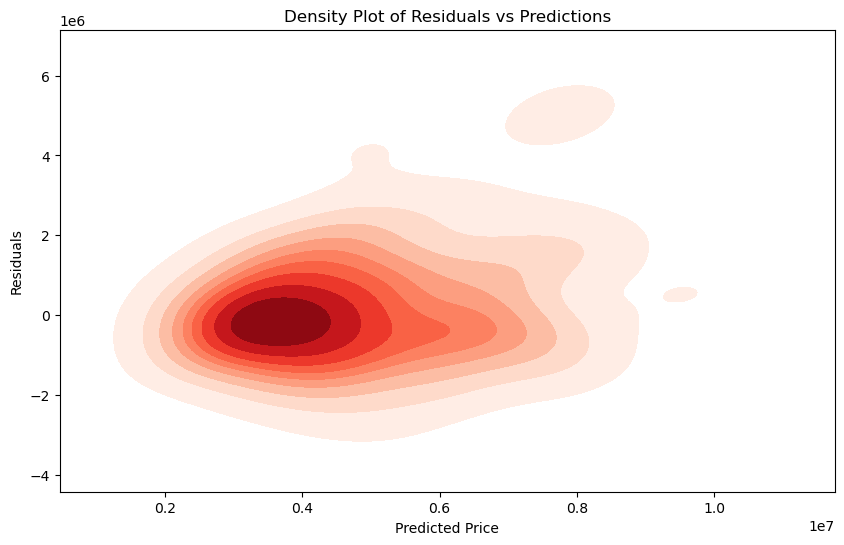

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=y_pred, y=residuals, cmap="Reds", fill=True)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Density Plot of Residuals vs Predictions")
plt.show()


### Error vs Feature Visualization

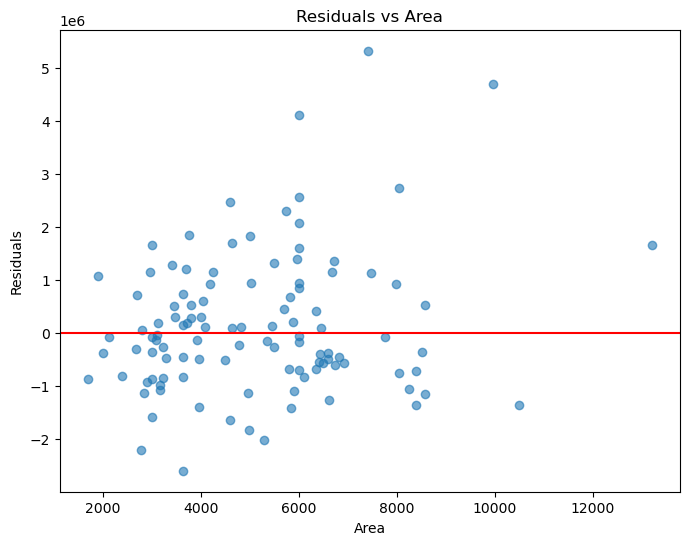

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X_test['area'], residuals, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Area")
plt.ylabel("Residuals")
plt.title("Residuals vs Area")
plt.show()
